Load the dataset and import pandas and matplotlib
We start by importing pandas and matplotlib. Then we read the data.  


In [183]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/kobep/Downloads/vehicles_data.csv", encoding="ISO-8859-1")





C:\Users\kobep\AppData\Local\Temp\ipykernel_10320\1958589626.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/kobep/Downloads/vehicles_data.csv", encoding="ISO-8859-1")


In [185]:
#Display first 5 rows
df.head()


,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
0,9/30/14,23:51:00,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,PARK RD AT HUNGERFORD DR,02 - Automobile,2014.0,FORD,MUSTANG,BLACK,Citation,BLACK,M,7949.0
1,3/31/15,23:59:00,HEADLIGHTS (*),CONNECTICUT AT METROPOLITAN AVE,02 - Automobile,2003.0,HONDA,2S,BLUE,ESERO,HISPANIC,M,3022.0
2,9/30/14,23:30:00,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,OBSERVATION @ RIDGE ROAD,02 - Automobile,2009.0,TOYOTA,CAMRY,RED,Warning,BLACK,F,4939.0
3,3/31/15,23:59:00,DRIVER FAILURE TO STOP AT STOP SIGN LINE,W/B PLYERS MILL RD AT METROPOLITAN AVE,02 - Automobile,2007.0,ACURA,MDX,BLACK,Warning,WHITE,F,4105.0
4,3/31/15,23:58:00,STOP LIGHTS (*),2355 NB AT BATTERY LN,02 - Automobile,2003.0,NISSAN,MURANO,SILVER,ESERO,OTHER,M,3000.0


Data Analysis: 
Find the 6th Newest Vehicle.  We sort the data by vehicle year in descending order and pick the 6th row to get the 6th most recent vehicle year and price.


In [148]:
#Convert Year to numeric
df['Year']=pd.to_numeric(df['Year'], errors='coerce')

#Filter invalid years out
df_filtered=df[(df['Year'] >= 2013) & (df['Year'] <= 2016)]

#Use filtered data and sort by Year 
df_year_sorted=df_filtered.dropna(subset=['Year']).sort_values(by='Year', ascending=False)

#Get the 6th newest vehicle 
sixth_newest=df_year_sorted.iloc[5]
sixth_newest_year=sixth_newest['Year']
sixth_newest_price=sixth_newest['Price']

#Print results
print("6th Newest Vehicle Year:", sixth_newest_year)
print("6th Newest Vehicle Price:", sixth_newest_price)


6th Newest Vehicle Year: 2016.0
6th Newest Vehicle Price: 8722.0


4th Oldest Vehicle.  
Here we sort the dataset by year to get the 4th oldest vehicle's year and price.


In [151]:
#Sort from filtered data
df_year_sorted_asc=df_filtered.sort_values(by='Year', ascending=True)

#Get 4th oldest vehicle
fourth_oldest=df_year_sorted_asc.iloc[3]
fourth_oldest_year=fourth_oldest['Year']
fourth_oldest_price=fourth_oldest['Price']

#Print 
print("4th Oldest Vehicle Year:", fourth_oldest_year)
print("4th Oldest Vehicle Price:", fourth_oldest_price)



4th Oldest Vehicle Year: 2013.0
4th Oldest Vehicle Price: 6025.0


Here we will Identify and count the number of missing values

In [154]:
#Total missing values 
total_missing=df.isnull().sum().sum()
print("Total missing values:", total_missing)


Total missing values: 26250


Missing Values Summary.

This table shows the number of missing values per column in the vehicle dataset.

In [156]:
#Count missing values by column
missing_values=df.isnull().sum()

# onvert to DataFrame
missing_df=pd.DataFrame({
    "Column Name": missing_values.index,
    "Missing Values": missing_values.values
})

#Print 
print(missing_df)



       Column Name  Missing Values
0     Date Of Stop               0
1     Time Of Stop               0
2      Description               5
3         Location             831
4      VehicleType             829
5             Year            6844
6             Make             872
7            Model             956
8            Color           10939
9   Violation Type             829
10            Race             829
11          Gender            1658
12           Price            1658


Here we will save the above data to a csv file.  

In [159]:
#Save to CSV file
missing_df.to_csv("missing_values.csv", index=False)


Data Visualization Section
In this section 5 charts are produced, printed, and discussed.  They are also saved as png files.  

Top 10 Vehicle Makes.

This bar chart shows the top 10 vehicle makes by their involvement in traffic violations, given thats the data were pulling from.  It shows that Toyotas, Honda's, and Fords are the top 3 vehicle manufacturers by their involvement in traffic violations.  This however is to be expected given the popularities of these manufacturers.  We can also see an abbreviated version of Honda and Toyota in this graph, that being Hond and Toyt respectivly.  

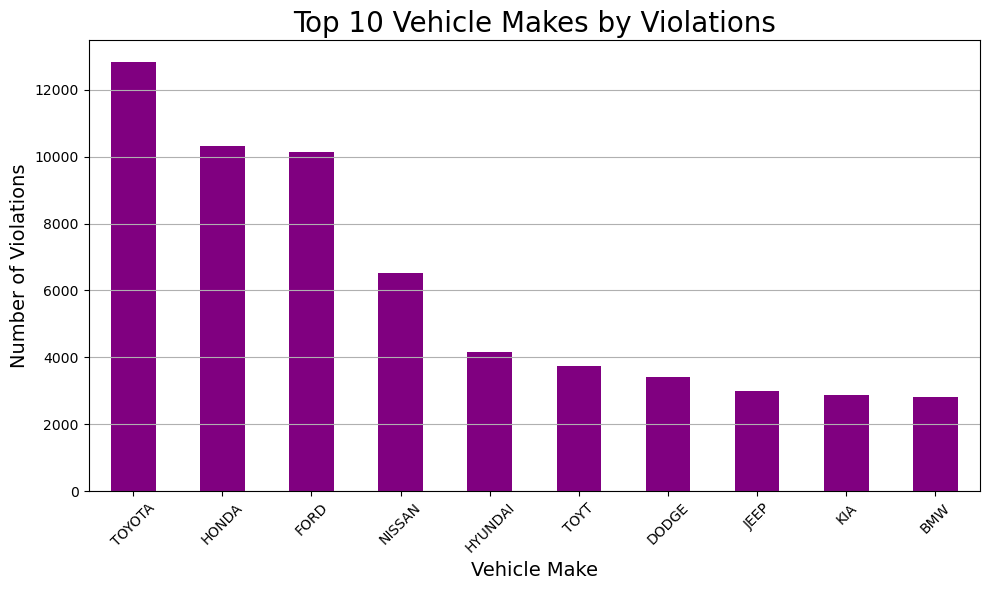

In [164]:
import matplotlib.pyplot as plt

#Count top 10 vehicle makes
top_makes=df_filtered['Make'].value_counts().head(10)

#Plot
plt.figure(figsize=(10, 6))
top_makes.plot(kind='bar', color='purple')

#Formatting Bar chart
plt.title('Top 10 Vehicle Makes by Violations', fontsize=20)
plt.xlabel('Vehicle Make', fontsize=14)
plt.ylabel('Number of Violations', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("Top10.png")
plt.show()


Top 10 Violation Types.

This bar chart shows the most common traffic violation types amo cars in the dataset.  We can se from the data that msot were let off with a warning, closely followed by a citation.  To be honest im not sure what esero and sero are.


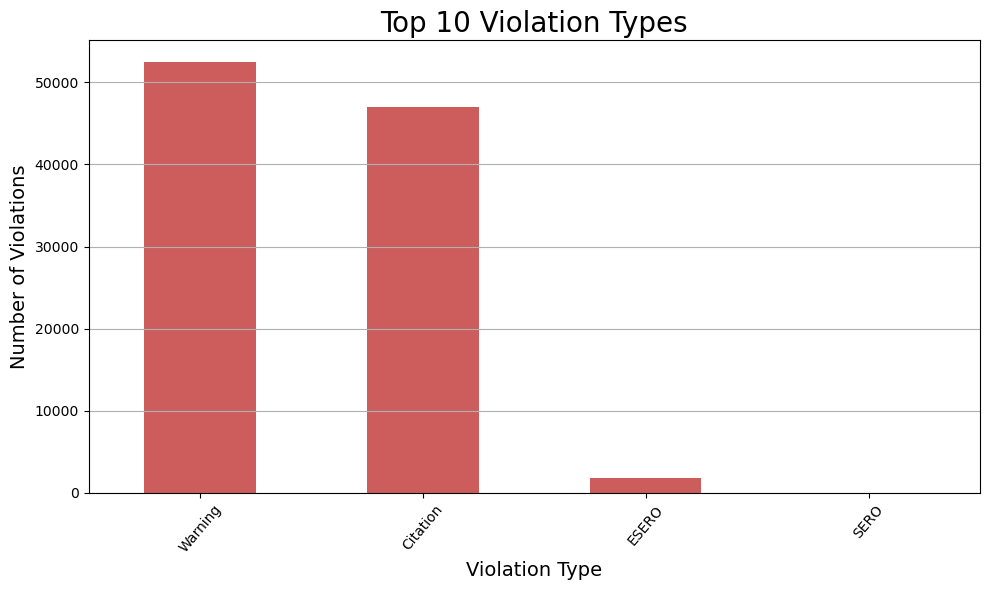

In [173]:
#Use filterd data
df_violation_types=df_filtered[df_filtered['Violation Type'].notnull()]

#Count top 10 violation types
top_violations=df_violation_types['Violation Type'].value_counts().head(10)

#Plot
plt.figure(figsize=(10, 6))
top_violations.plot(kind='bar', color='indianred')

plt.title('Top 10 Violation Types', fontsize=20)
plt.xlabel('Violation Type', fontsize=14)
plt.ylabel('Number of Violations', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=50)

plt.tight_layout()
plt.savefig("violationtypes.png")
plt.show()





Top 10 Most Common Vehicle Colors

This chart shows the most common vehicle colors in the dataset.  We can see black, gray and white are the most common car colors within our dataset.  However Black has a commanding lead in first place.  This makes sense given its neutral coloring, and its ability to appear nice even without frequent cleaning.     

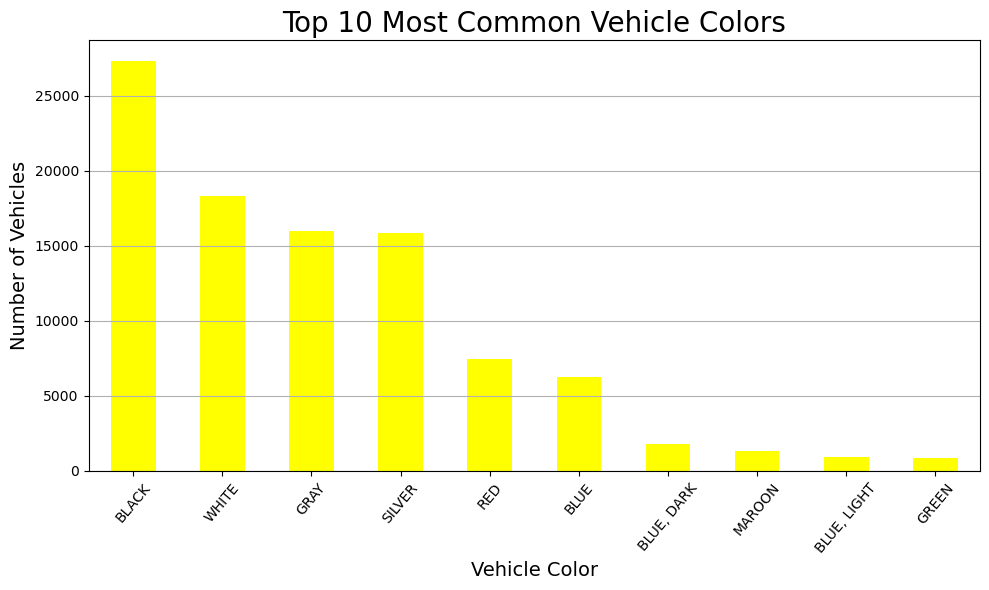

In [179]:
#Drop entries missing colors
df_colors=df_filtered[df_filtered['Color'].notnull()]


#Count top 10 
top_colors=df_colors['Color'].value_counts().head(10)

#Plot
plt.figure(figsize=(10, 6))
top_colors.plot(kind='bar', color='yellow')

plt.title('Top 10 Most Common Vehicle Colors', fontsize=20)
plt.xlabel('Vehicle Color', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=50)

plt.tight_layout()
plt.savefig("carcolors.png")
plt.show()


Distribution of Vehicle Production Years

This histogram displays how vehicles are distributed by their production year from out given dataset.  As we can see, the majority of our cars found in this dataset come from the year 2013, which makes sense given the 2013-2016 timeframe used.  

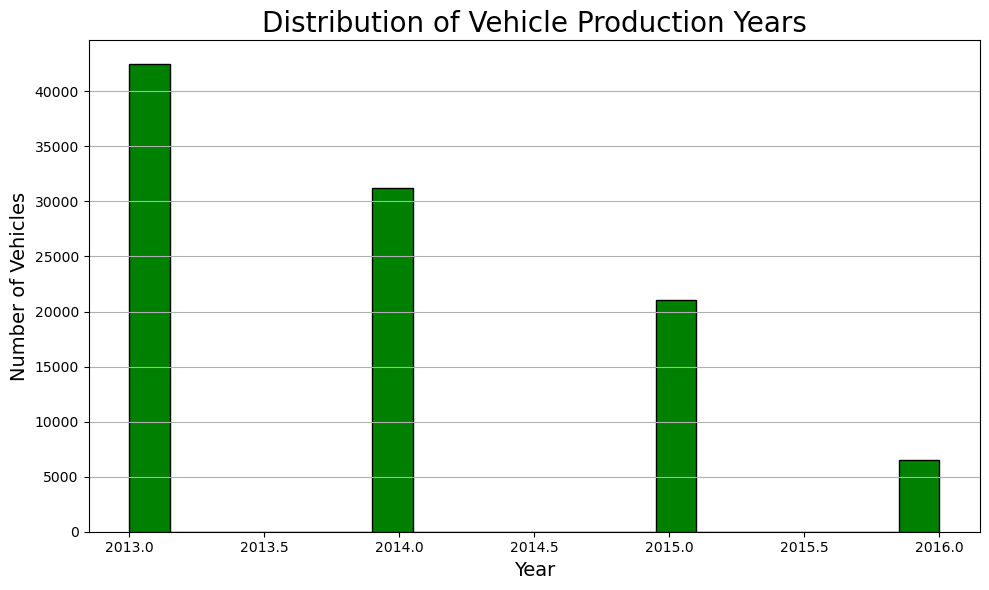

In [177]:
#Use the filtered data
valid_years=df_filtered['Year']

#Plot 
plt.figure(figsize=(10, 6))
valid_years.plot(kind='hist', bins=20, color='green', edgecolor='black')

plt.title('Distribution of Vehicle Production Years', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig("productionyears.png")
plt.show()


Driver citations by Gender.

This pie chart shows the breakdown of traffic violations in the dataset by gender.  We can see that men commit 2/3rds of all traffic violations recorded here.  This is likely due to both increased rechlessness of male drivers and a larger number of male drivers.  


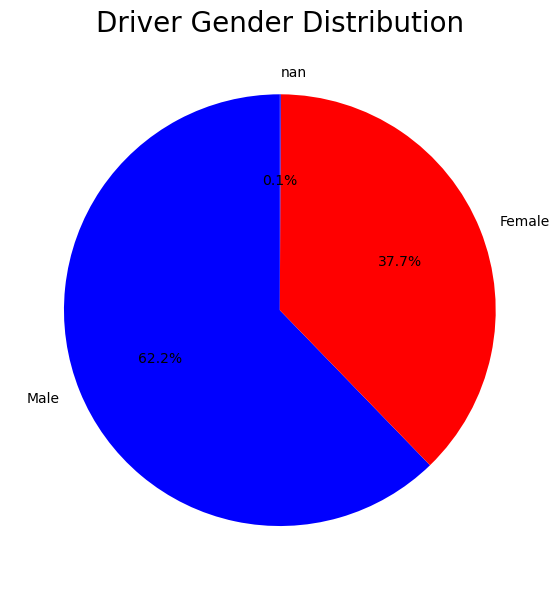

In [181]:
#Drop missing values
df_gender=df_filtered[df_filtered['Gender'].notnull()]

#Count gender 
gender_counts=df_gender['Gender'].value_counts()

#Map shorthand to propper titles
gender_labels=gender_counts.index.map({'M': 'Male', 'F': 'Female'})

#Plot
plt.figure(figsize=(6, 6))
gender_counts.plot(
    kind='pie',
    labels=gender_labels,              
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'red']
)

plt.title('Driver Gender Distribution', fontsize=20)
plt.ylabel('') 

plt.tight_layout()
plt.savefig("genderbreakdown.png")
plt.show()

